In [9]:
from utils import *

In [10]:
respondents, results, cardsE, cardsB = loadData()
latestMatrices = finalMatrices()

# Similarity matrix comparision

## Linear regression

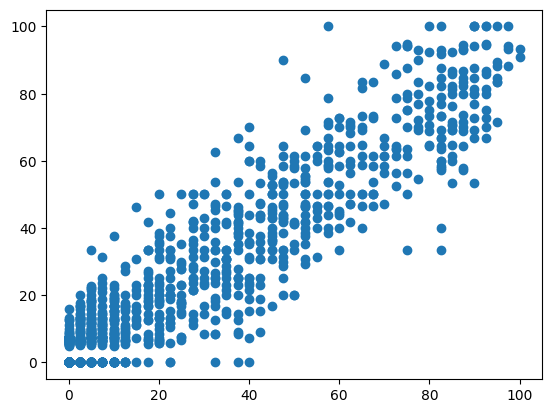

0.8879775400865486
0.8927437166991435 1.565354189210634 0.9328333280509941 0.0 0.009860152624410014


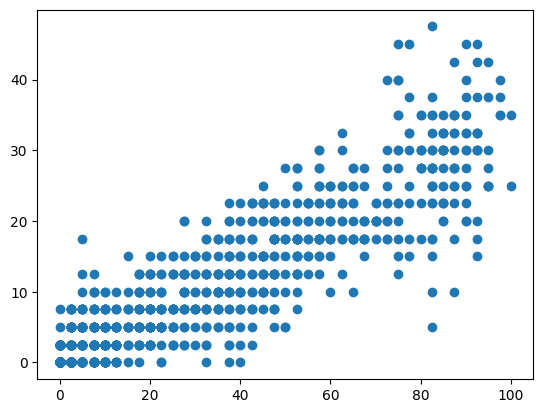

0.8782238762002238
0.3239210059775603 0.4293122337220989 0.9107074849641265 0.0 0.0042009896179885


In [ ]:
for i in ['similarity', 'similarityAbsolute']:
    x1 = np.array(np.matrix(latestMatrices[i]['E50']['data'])[np.triu_indices(latestMatrices[i]['E50']['data'].shape[0], k = 1)])[0]
    y1 = np.array(np.matrix(latestMatrices[i]['E30']['data'])[np.triu_indices(latestMatrices[i]['E30']['data'].shape[0], k = 1)])[0]
    tmp = pd.DataFrame({'x': x1, 'y':y1})
    cor2, p2 = spearmanr(tmp.x, tmp.y)
    plt.scatter(x=tmp.x, y=tmp.y)
    plt.show()
    print(cor2)
    slope, intercept, r, p, std_err = linregress(tmp.x, tmp.y)
    print(slope, intercept, r, p, std_err)

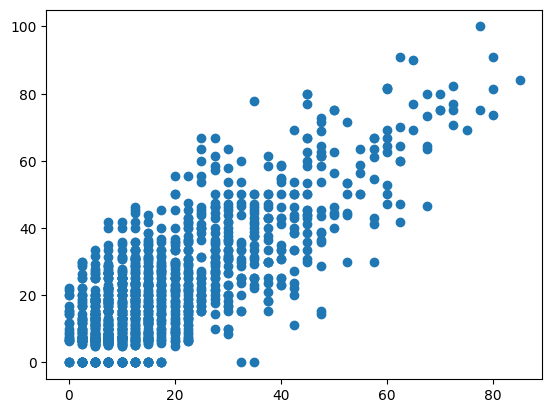

0.6690950065653839
0.906483700016302 5.83127226422836 0.7828678247615914 2.6941551125685516e-254 0.02060060579417666


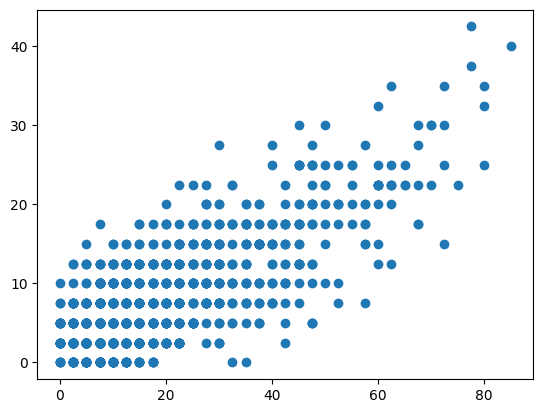

0.6425476730898072
0.31701152027429863 2.0878639275997104 0.7571174681329157 2.2091450927930042e-228 0.007821626775683115


In [12]:
for i in ['similarity', 'similarityAbsolute']:
    x1 = np.array(np.matrix(latestMatrices[i]['B50']['data'])[np.triu_indices(latestMatrices[i]['B50']['data'].shape[0], k = 1)])[0]
    y1 = np.array(np.matrix(latestMatrices[i]['B30']['data'])[np.triu_indices(latestMatrices[i]['B30']['data'].shape[0], k = 1)])[0]
    tmp = pd.DataFrame({'x': x1, 'y':y1})
    cor2, p2 = spearmanr(tmp.x, tmp.y)
    plt.scatter(x=tmp.x, y=tmp.y)
    plt.show()
    print(cor2)
    slope, intercept, r, p, std_err = linregress(tmp.x, tmp.y)
    print(slope, intercept, r, p, std_err)

## AMI scores

In [13]:
m1 = makeMatrix('similarity', results[results.variant=='E50'], cardsE, 40)
m2 = makeMatrix('similarity', results[results.variant=='E30'], cardsE, 40)
adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE))[1], getClustersKmeans(m2, len(cardsE))[1])

np.float64(0.7075615824662862)

In [14]:
m1 = makeMatrix('similarity', results[results.variant=='B50'], cardsB, 40)
m2 = makeMatrix('similarity', results[results.variant=='B30'], cardsB, 40)
adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE))[1], getClustersKmeans(m2, len(cardsE))[1])

np.float64(0.4867676365483759)

In [15]:
m1 = makeMatrix('similarity', results[results.variant=='E50'], cardsE, 40)
m2 = makeMatrix('similarityAbsolute', results[results.variant=='E30'], cardsE, 40)
adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE))[1], getClustersKmeans(m2, len(cardsE))[1])

np.float64(0.6058910744157291)

In [16]:
m1 = makeMatrix('similarity', results[results.variant=='B50'], cardsB, 40)
m2 = makeMatrix('similarityAbsolute', results[results.variant=='B30'], cardsB, 40)
adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE))[1], getClustersKmeans(m2, len(cardsE))[1])

np.float64(0.41067403364849975)

In [17]:
res = []
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    print(measure)
    for variant in ['E50', 'E30', 'B50', 'B30']:
        i1 = respondents[respondents.variant==variant].sort_values(measure)[:20].respondent.values
        i2 = respondents[respondents.variant==variant].sort_values(measure)[20:].respondent.values
        m1 = makeMatrix('similarity', results[(results.respondent.isin(i1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 20)
        m2 = makeMatrix('similarity', results[(results.respondent.isin(i2)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 20)
        
        print(" ", variant, "   ", adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE) - 6)[1], getClustersKmeans(m2, len(cardsE) - 6)[1]))

bfExtra
  E50     0.8214996888909212
  E30     0.5964014309830051
  B50     0.49978650324794255
  B30     0.39187661508579363
bfAgree
  E50     0.9176065139762898
  E30     0.5727011757537793
  B50     0.5383242607465095
  B30     0.35926060921721503
bfConsc
  E50     0.8203874971633288
  E30     0.5353310873954493
  B50     0.5637185904145731
  B30     0.34842847533262084
bfNegEmo
  E50     0.8097874950839102
  E30     0.65629487658802
  B50     0.5495133430896034
  B30     0.3740459532538206
bfOpenMind
  E50     0.8471360384926974
  E30     0.5985644070841122
  B50     0.43459196558563556
  B30     0.4137756403333966


In [18]:
res = []
for variant in ['E50', 'E30', 'B50', 'B30']:
    i1 = respondents[respondents.variant==variant].sort_values('crt')[:20].respondent.values
    i2 = respondents[respondents.variant==variant].sort_values('crt')[20:].respondent.values
    r1 = respondents[respondents.respondent.isin(i1)].respondent.values
    r2 = respondents[respondents.respondent.isin(i2)].respondent.values
    m1 = makeMatrix('similarity', results[(results.respondent.isin(r1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
    m2 = makeMatrix('similarity', results[(results.respondent.isin(r2)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
    print(" ", variant, "   ", adjusted_mutual_info_score(getClustersKmeans(m1, len(cardsE) - 6)[1], getClustersKmeans(m2, len(cardsE) - 6)[1]))

  E50     0.8439948638081884
  E30     0.5731128816517527
  B50     0.553371176254935
  B30     0.3677309300137335
